In [1]:
##Se ajustan las rutas donde python busca sus librerias.
import sys

# Mostrar la ubicación del intérprete de Python actual
print("Python ejecutable:", sys.executable)

# Mostrar las rutas actuales donde Python busca los módulos
print("Rutas actuales:", sys.path)

# Añadir una nueva ruta al principio de sys.path (antes de otras rutas existentes)
sys.path.insert(0, 'C:\\Users\\Pato\\Desktop\\PROYECTO\\myenv\\Lib\\site-packages')
# sys.path.insert(0,r'C:\Users\Pato\anaconda3\envs\ptf3.7\lib\site-packages')
# Mostrar las rutas actualizadas
print("Rutas actualizadas:", sys.path)

# print("TensorFlow version:", tf.__version__)

Python ejecutable: c:\Users\Pato\Desktop\PROYECTO\myenv\Scripts\python.exe
Rutas actuales: ['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\Pato\\Desktop\\PROYECTO\\myenv', '', 'c:\\Users\\Pato\\Desktop\\PROYECTO\\myenv\\Lib\\site-packages', 'c:\\Users\\Pato\\Desktop\\PROYECTO\\myenv\\Lib\\site-packages\\win32', 'c:\\Users\\Pato\\Desktop\\PROYECTO\\myenv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Pato\\Desktop\\PROYECTO\\myenv\\Lib\\site-packages\\Pythonwin']
Rutas actualizadas: ['C:\\Users\\Pato\\Desktop\\PROYECTO\\myenv\\Lib\\site-packages', 'C:\\Program Files\\WindowsApps\\PythonSoftwa

In [2]:
import pandas as pd
import numpy as np
import matplotlib  as plt  

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", plt.__version__) 


Pandas version: 2.2.2
NumPy version: 1.26.4
Matplotlib version: 3.9.0


In [9]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

# Parámetros del dataset
pxDataSet = 224
classes = ['sadness', 'happiness', 'fear', 'neutrality', 'surprise', 'anger', 'disgust', 'contempt']
width_shape = pxDataSet
height_shape = pxDataSet
batch_size = 50

# Directorio del dataset
dataSetDir = "C:\\Users\\Pato\\Desktop\\PROYECTO\\archiveDataset224\\data"

# Configuración del generador de imágenes
dataset_datagen = ImageDataGenerator()

# Generador de datos desde el directorio 
dataset_generator = dataset_datagen.flow_from_directory(
    dataSetDir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True
)

# Obtener el tamaño del dataset
dataset_size = len(dataset_generator)

# Calcular tamaños de entrenamiento y prueba dividiendo un 80% para entrenamiento y el restante para prueba
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size

# Listas para almacenar todos los datos
all_train_images = []
all_train_labels = []
all_test_images = []
all_test_labels = []

# Iterar sobre el generador para obtener todos los datos
for i in range(train_size):
    images, labels = next(dataset_generator)
    all_train_images.extend(images)
    all_train_labels.extend(labels)

for i in range(test_size):
    images, labels = next(dataset_generator)
    all_test_images.extend(images)
    all_test_labels.extend(labels)

# Convertir listas a tensores 
train_images = tf.convert_to_tensor(all_train_images)
train_labels = tf.convert_to_tensor(all_train_labels)
test_images = tf.convert_to_tensor(all_test_images)
test_labels = tf.convert_to_tensor(all_test_labels)

# Mostrar la estructura de los datasets
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


Found 32854 images belonging to 8 classes.
(26300, 224, 224, 1)
(26300, 8)
(6554, 224, 224, 1)
(6554, 8)


In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

## Extracción de Características
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (width_shape,height_shape,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

## Clasificación
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='softmax'))

# Revisamos el modelo CNN
model.summary()

# Compilamos y estamos listos para el entrenamiento
opt = Adam(learning_rate=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

c:\Users\Pato\Desktop\PROYECTO\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,852,744 (18.51 MB)

 Trainable params: 4,849,992 (18.50 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [8]:
# Necesario para logear 

import os
from time import strftime
from pathlib import Path

def get_run_logdir(root_logdir="model_logs"):
    # Obtener el directorio de trabajo actual
    notebook_dir = Path(os.getcwd()).resolve()

    # Combinar el directorio actual con el directorio de logs
    log_dir = notebook_dir / root_logdir

    # Crear el directorio si no existe
    os.makedirs(log_dir, exist_ok=True)

    # Devolver la ruta completa con un nombre de directorio basado en la fecha/hora actual
    return log_dir / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
print("Directorio de logs:", run_logdir)

Directorio de logs: C:\Users\Pato\Desktop\PROYECTO\model_logs\run_2024_07_10_08_58_06


**Entrenamiento**

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint = tf.keras.callbacks.ModelCheckpoint("model_1.keras", save_best_only=True)
tensorboard = tf.keras.callbacks.TensorBoard(run_logdir)

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, checkpoint, tensorboard])

Epoch 1/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1433s 2s/step - accuracy: 0.2776 - loss: 1.9754 - val_accuracy: 0.3341 - val_loss: 1.7353
Epoch 2/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1420s 2s/step - accuracy: 0.4105 - loss: 1.5732 - val_accuracy: 0.4538 - val_loss: 1.4548
Epoch 3/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1533s 2s/step - accuracy: 0.4619 - loss: 1.4257 - val_accuracy: 0.5079 - val_loss: 1.3085
Epoch 4/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1533s 2s/step - accuracy: 0.5182 - loss: 1.2935 - val_accuracy: 0.5447 - val_loss: 1.2334
Epoch 5/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1535s 2s/step - accuracy: 0.5449 - loss: 1.2177 - val_accuracy: 0.5793 - val_loss: 1.1626
Epoch 6/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1543s 2s/step - accuracy: 0.5786 - loss: 1.1255 - val_accuracy: 0.6096 - val_loss: 1.0834
Epoch 7/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1535s 2s/step - accuracy: 0.6093 - loss: 1.0636 - val_accuracy: 0.6161 - val_loss: 1.0605
Epoch 8/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1531s 2s/step - accuracy: 0.6283 - loss: 1.0087 - 

In [7]:
from tensorflow.keras.models import load_model

# Ruta al archivo del modelo 
modelo_archivo = 'model_1_224.keras'

# Cargar el modelo
modelo = load_model(modelo_archivo)

In [17]:
modelo.evaluate(test_images,test_labels)

205/205 ━━━━━━━━━━━━━━━━━━━━ 62s 299ms/step - accuracy: 0.8502 - loss: 0.4857


[0.4747709035873413, 0.8527616858482361]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
contempt


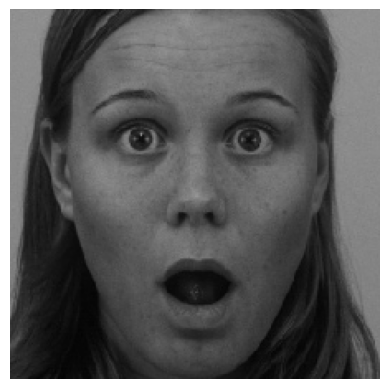

In [19]:
from tensorflow.keras.models import load_model
import cv2 as cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import os

faces = []

# Cargamos una imagen del directorio
#imaget_path = r"C:\\Users\\Pato\\Desktop\\PROYECTO\\images\\validation\\fear\\21.jpg"
imaget_path = r"C:\Users\Pato\Desktop\PROYECTO\archiveDataset224\data\surprise\AF19SUS.png"


# Redimensionamos la imagen y convertimos a gray
face = cv2.cvtColor(cv2.imread(imaget_path), cv2.COLOR_BGR2GRAY)
face = cv2.resize(face, (224, 224))
face2 = img_to_array(face)
face2 = np.expand_dims(face2,axis=0)

faces.append(face2)

# El modelo estima la predicción
preds = modelo.predict(faces)

print(classes[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(face),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt



# Configuración del dataset de validación
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(  
    dataSetDir,  
    target_size=(width_shape, height_shape),  
    batch_size=batch_size,  
    color_mode='grayscale',  
    class_mode='categorical', 
    shuffle=False)

# Realizar predicciones
predictions = modelo.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = val_generator.classes

# Crear y mostrar la matriz de confucion 
matc = confusion_matrix(y_real, y_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(5,5), show_normed=False)
plt.tight_layout()
plt.show()

# Imprimir el reporte de clasificación
print(classification_report(y_real, y_pred, digits=4))


# Se realiza la matriz de confusion sobre la totalidad de los datos no supe como pasarle 
# algo distinto a una ruta al flow_from_directory ya que el train data y el test  son 
# calculados  y no estan sobre una diferenciacion de las carpetas como tal
#classes = ['sadness', 'happiness', 'fear', 'neutrality', 'surprise', 'anger', 'disgust', 'contempt']

658/658 ━━━━━━━━━━━━━━━━━━━━ 299s 454ms/step


NameError: name 'y_val' is not defined